In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
xls = pd.ExcelFile("TikTok_Dataset.xlsx")
bulgarian_df = pd.read_excel(xls, "Bulgaria")
romanian_df = pd.read_excel(xls, "Romania")
poland_df = pd.read_excel(xls, "Poland")

In [103]:
poland_df.head()

,Post Number,Term,Poster_Username,Num_Likes,Num_Comments,Num_Views,Hashtags_Used,Post_Sentiment,Comments_Sentiment
0,1,War in Ukraine,jajyaywhynot,158800,2390,3300000,#ukraine #ukraina🇺🇦poland🇵🇱 #wojnanaukrainie #...,Unclear,Neutral/Unrelated
1,2,War in Ukraine,sylweknev,282000,1724,6000000,#ukraine #wojna #wojnanaukrainie,Unclear,Neutral/Unrelated
2,3,War in Ukraine,skokwbok2,41500,1316,754600,#andrzejduda #prezydent #frankly #wojnanaukrai...,Unclear,Neutral/Unrelated
3,4,War in Ukraine,damien_nawa,58800,2051,1700000,#dc #damiannawa #wojnanaukrainie #rząd #ustawa...,Informational/Educational,Agreement
4,5,War in Ukraine,tetianamichal,52200,1173,1900000,#wojna #ukraina #рівне #wojnanaukrainie #wojna...,Informational/Educational,Neutral/Unrelated


In [104]:
poland_df.shape

(250, 9)

In [105]:
# For Poland
def search_term_views(df):
    print("War in Ukraine: ", df.loc[df["Term"] == "War in Ukraine", "Num_Views"].sum())
    print("Putin: ", df.loc[df["Term"] == "Putin", "Num_Views"].sum())
    print("Zelensky: ", df.loc[df["Term"] == "Zelensky", "Num_Views"].sum())
    print("Stand with Ukraine: ", df.loc[df["Term"] == "Stand with Ukraine", "Num_Views"].sum())
    print("Stand with Russia: ", df.loc[df["Term"] == "Stand with Russia", "Num_Views"].sum())

In [106]:
search_term_views(poland_df)

War in Ukraine:  61141155
Putin:  204547126
Zelensky:  68083698
Stand with Ukraine:  51610969
Stand with Russia:  10517000


## 2. Engagement vs Sentiment

Examine the relationship between post engagement (likes, comments, views) and sentiment. This can help identify which sentiments garner more engagement or attention

In [107]:
poland_df["Post_Sentiment"].unique()

array(['Unclear', 'Informational/Educational', 'Isolationist/Indifferent',
       'Pro-Ukraine', 'Pro-Russia', 'Pro-Zelensky', 'Anti-Zelensky',
       'Neutral'], dtype=object)

In [108]:
sentiment_categories_1 = np.array(["Unclear", "Informational/Educational", "Isolationist/Indifferent",
                                   "Pro-Ukraine", "Pro-Russia"])
sentiment_categories_2 = np.array(["Unclear", "Informational/Educational", "Isolationist/Indifferent",
                                   "Pro-Zelensky", "Anti-Zelensky"])
sentiment_categories_3 = np.array(["Unclear", "Informational/Educational", "Isolationist/Indifferent",
                                   "Pro-Putin", "Anti-Putin"])

In [109]:
def engagement_analysis(df):
    # Takes as input a df from a country
    
    commonSentiments = np.array(["Unclear", "Informational/Educational",
                                          "Isolationist/Indifferent", "Neutral"])
    #sentimentCategories = df["Post_Sentiment"].unique()
    terms = df["Term"].unique()
    for term in terms:
        if term == "Putin":
            extraSentiments = np.array(["Pro-Putin", "Anti-Putin"])
        elif term == "Zelensky":
            extraSentiments = np.array(["Pro-Zelensky", "Anti-Zelensky"])
        else:
            extraSentiments = np.array(["Pro-Ukraine", "Pro-Russia"])
        tdf = df.loc[df["Term"] == term]
        # sentimentCategories = tdf["Post_Sentiment"].unique()
        
        sentimentCategories = np.concatenate([commonSentiments, extraSentiments])
        for sentiment in sentimentCategories:
            ttdf = tdf.loc[tdf["Post_Sentiment"] == sentiment]
            print(term, sentiment, ttdf["Num_Views"].sum())
            

In [110]:
def engagement_analysis2(df):
    # Takes as input a df from a country
    
    sentimentCategories = df["Post_Sentiment"].unique()
    terms = df["Term"].unique()
    for term in terms:
        tdf = df.loc[df["Term"] == term]
        # sentimentCategories = tdf["Post_Sentiment"].unique()
        
        for sentiment in sentimentCategories:
            ttdf = tdf.loc[tdf["Post_Sentiment"] == sentiment]
            print(term, sentiment, ttdf["Num_Views"].sum())

In [111]:
result = poland_df.groupby(['Term', 'Post_Sentiment'])['Num_Views'].sum().reset_index()

result.head()

,Term,Post_Sentiment,Num_Views
0,Putin,Informational/Educational,1402379
1,Putin,Pro-Russia,111038800
2,Putin,Pro-Ukraine,10453168
3,Putin,Unclear,81652779
4,Stand with Russia,Informational/Educational,721900


In [112]:
result = poland_df.groupby(['Term', 'Post_Sentiment'])['Num_Views'].agg(lambda x: ', '.join(map(str, x))).reset_index()

result.head()

,Term,Post_Sentiment,Num_Views
0,Putin,Informational/Educational,"2379, 1400000"
1,Putin,Pro-Russia,"167700, 18400, 198900, 3700000, 14500000, 1400..."
2,Putin,Pro-Ukraine,"30200, 80200, 87400, 10200000, 53500, 1375, 493"
3,Putin,Unclear,"66400, 198000, 3000000, 4971, 6200000, 8105, 2..."
4,Stand with Russia,Informational/Educational,"30300, 182600, 43500, 58800, 185000, 142400, 7..."


In [113]:
# Palette options
"""
#'Yellow1': '#FFD700',   # Metallic Gold
#  'Yellow2': '#FFFF99',   # Pale Canary
#  'Negative': '#595959'
'Red1': '#FF5555',      # Coral Red
'Red2': '#FF9999',      # Light Salmon
'Negative': '#595959'   # Dark Gray (as a negative color for red)
"""

custom_palette = {
    'Pro-Ukraine': 'yellow',
    'Pro-Zelensky': '#FFFF99',
    'Anti-Zelensky': '#FF6347',
    'Pro-Russia': 'red',
    'Pro-Putin': '#FF9999',
    'Anti-Putin': '#FFD700',
    'Informational/Educational': '#A2C8B9',
    'Isolationist/Indifferent': '#9DBAD5',
    'Unclear': '#C2B5E2',
    'Neutral': '#B0B5C3'
}
legend_order1 = ['Pro-Ukraine', 'Pro-Zelensky', 'Anti-Putin', 'Pro-Russia', 
                'Pro-Putin', 'Anti-Zelensky', 'Informational/Educational',
                'Isolationist/Indifferent', 'Unclear', 'Neutral']
legend_order2 = ['Pro-Ukraine', 'Pro-Zelensky', 'Anti-Putin', 'Informational/Educational',
                'Isolationist/Indifferent', 'Unclear', 'Neutral',
                'Pro-Russia', 'Pro-Putin', 'Anti-Zelensky',]

## Boxplots for View Counts

Text(0.5, 1.0, 'View Count from Poland TikToks by Search Term and Post Sentiment')

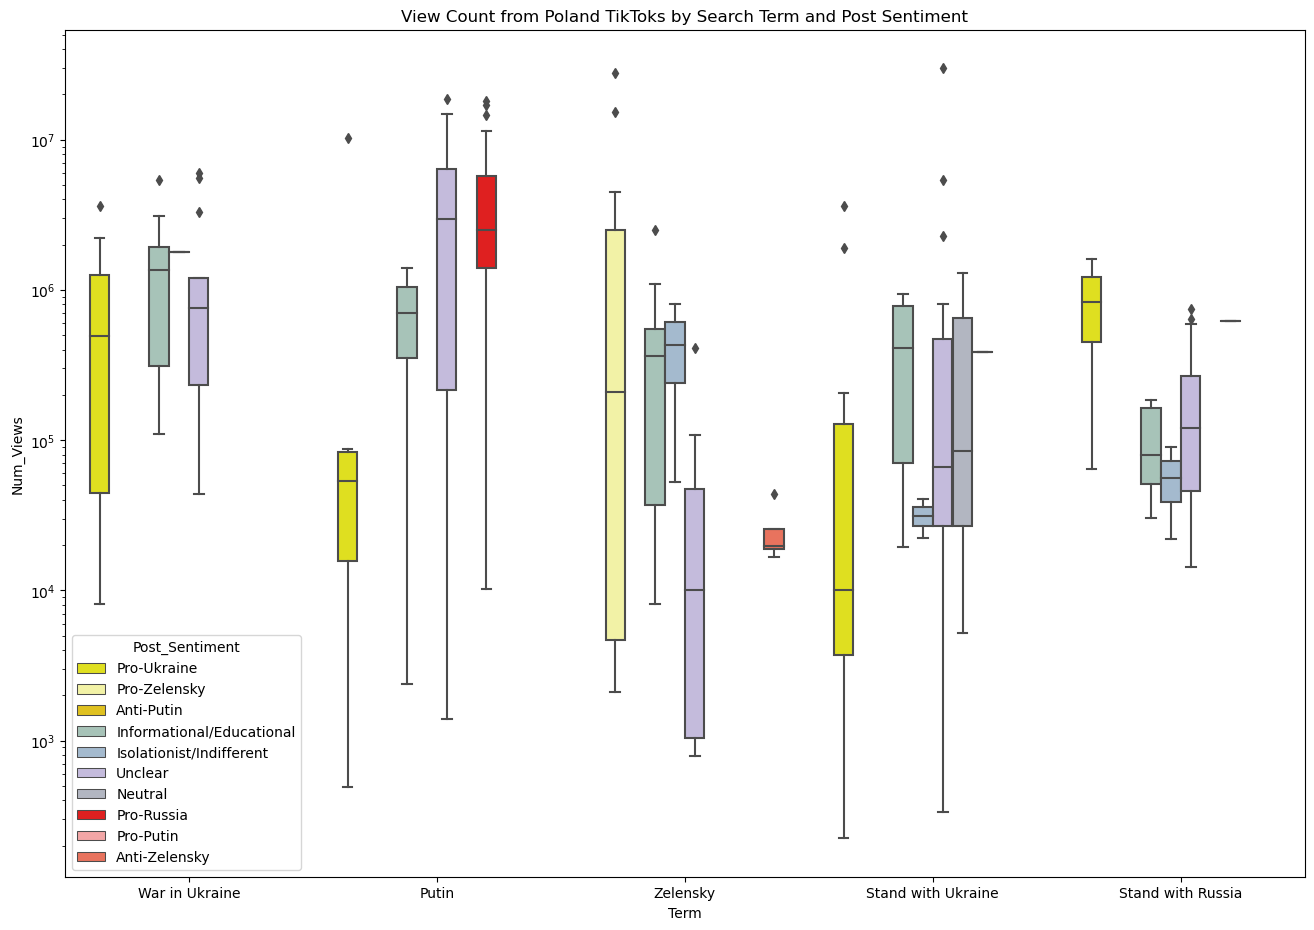

In [114]:
# Create a boxplot using Seaborn with two category types
plt.figure(figsize=(16, 11))
sns.boxplot(x='Term', y='Num_Views', hue='Post_Sentiment', data=poland_df, palette=custom_palette, hue_order=legend_order2)
plt.yscale('log')

# Add labels and title
plt.xlabel('Term')
plt.ylabel('Num_Views')
plt.title('View Count from Poland TikToks by Search Term and Post Sentiment')

Text(0.5, 1.0, 'View Count from Bulgaria TikToks by Search Term and Post Sentiment')

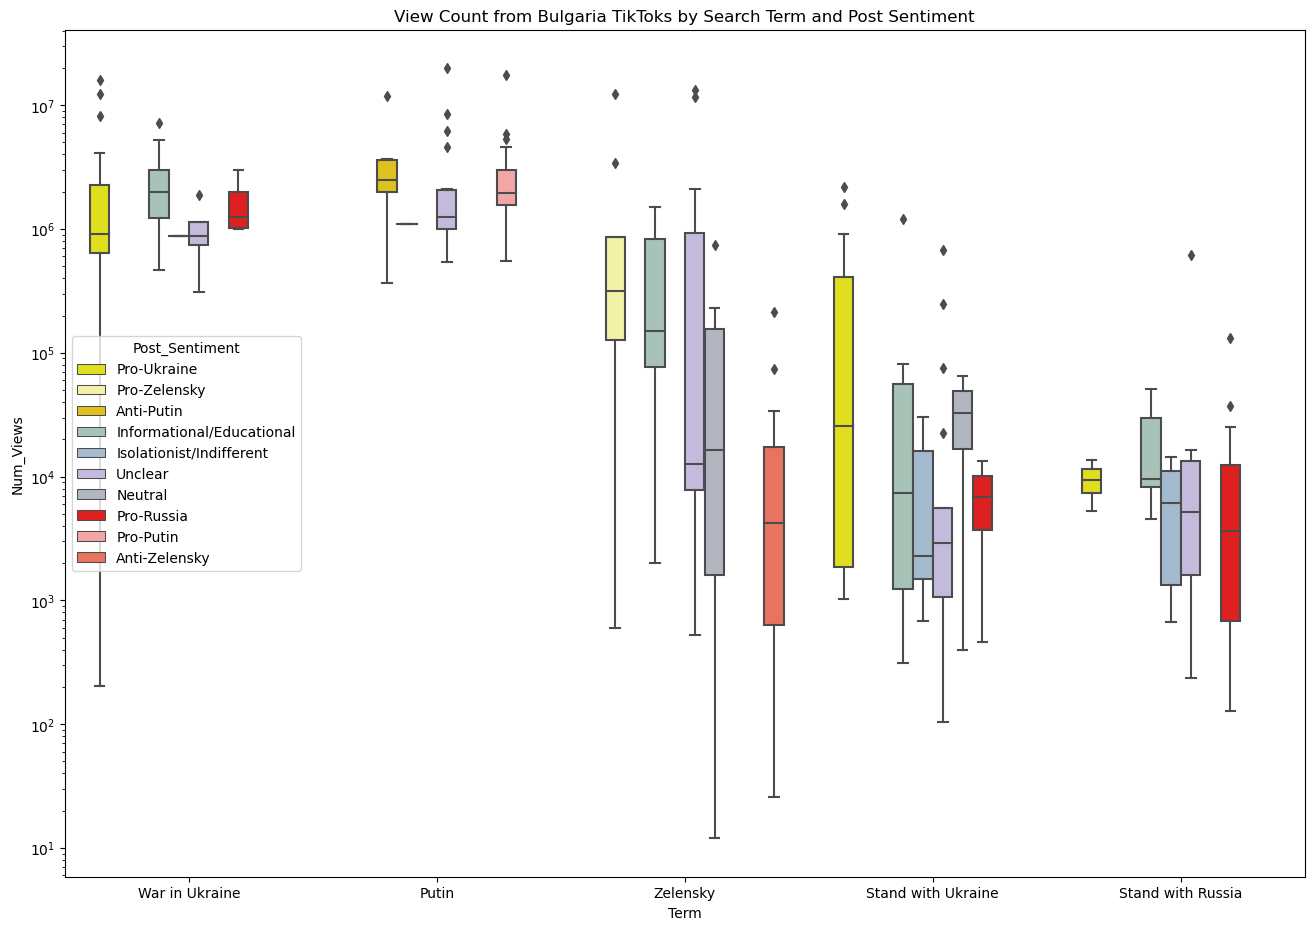

In [115]:
plt.figure(figsize=(16, 11))
sns.boxplot(x='Term', y='Num_Views', hue='Post_Sentiment', data=bulgarian_df, palette=custom_palette, hue_order=legend_order2)
plt.yscale('log')

# Add labels and title
plt.xlabel('Term')
plt.ylabel('Num_Views')
plt.title('View Count from Bulgaria TikToks by Search Term and Post Sentiment')

Text(0.5, 1.0, 'View Count from Romania TikToks by Search Term and Post Sentiment')

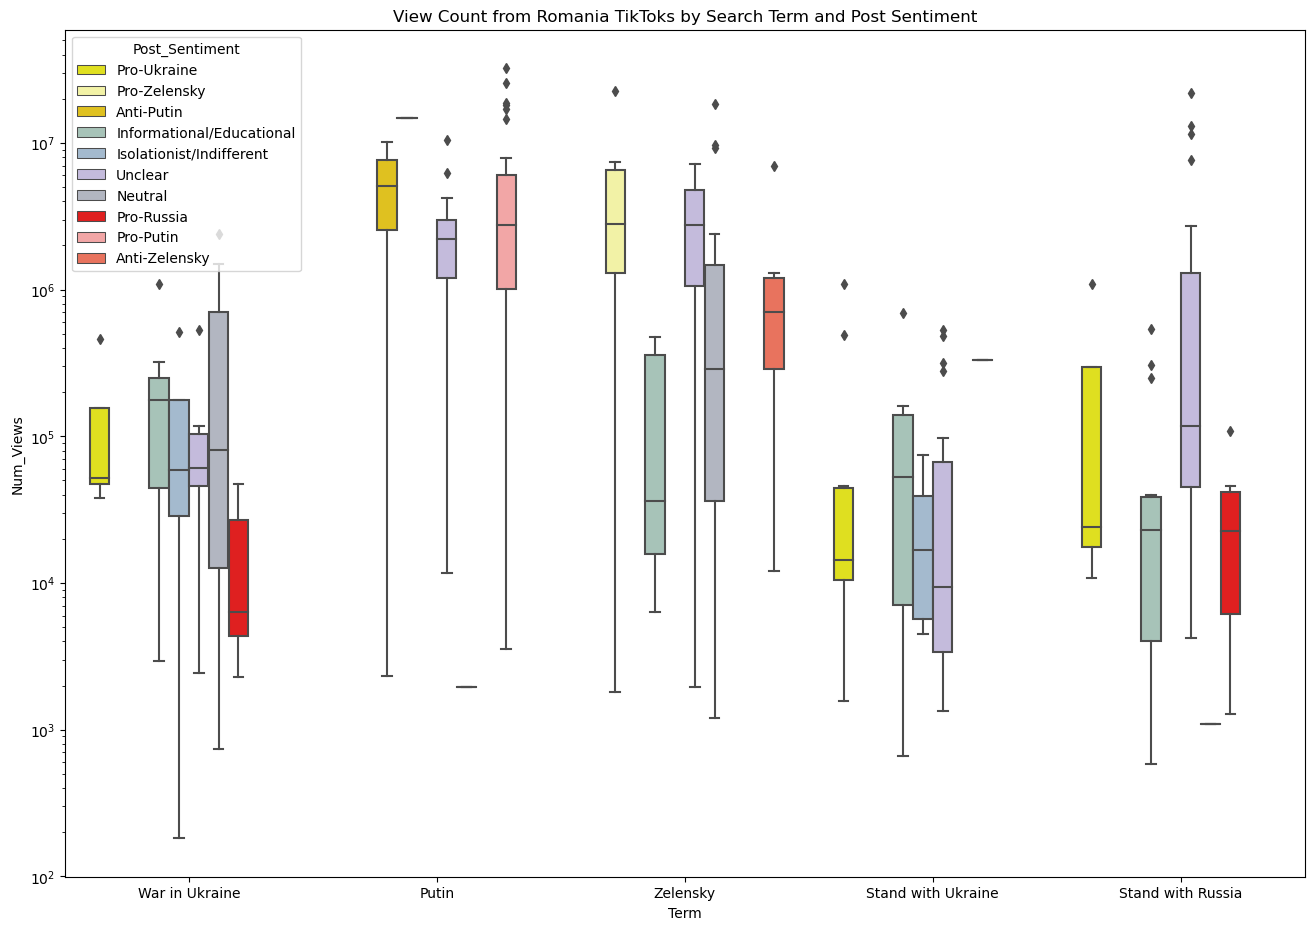

In [116]:
plt.figure(figsize=(16, 11))
sns.boxplot(x='Term', y='Num_Views', hue='Post_Sentiment', data=romanian_df, palette=custom_palette, hue_order=legend_order2)
plt.yscale('log')

# Add labels and title
plt.xlabel('Term')
plt.ylabel('Num_Views')
plt.title('View Count from Romania TikToks by Search Term and Post Sentiment')

## Boxplots for View Counts

Text(0.5, 1.0, 'Like Count from Poland TikToks by Search Term and Post Sentiment')

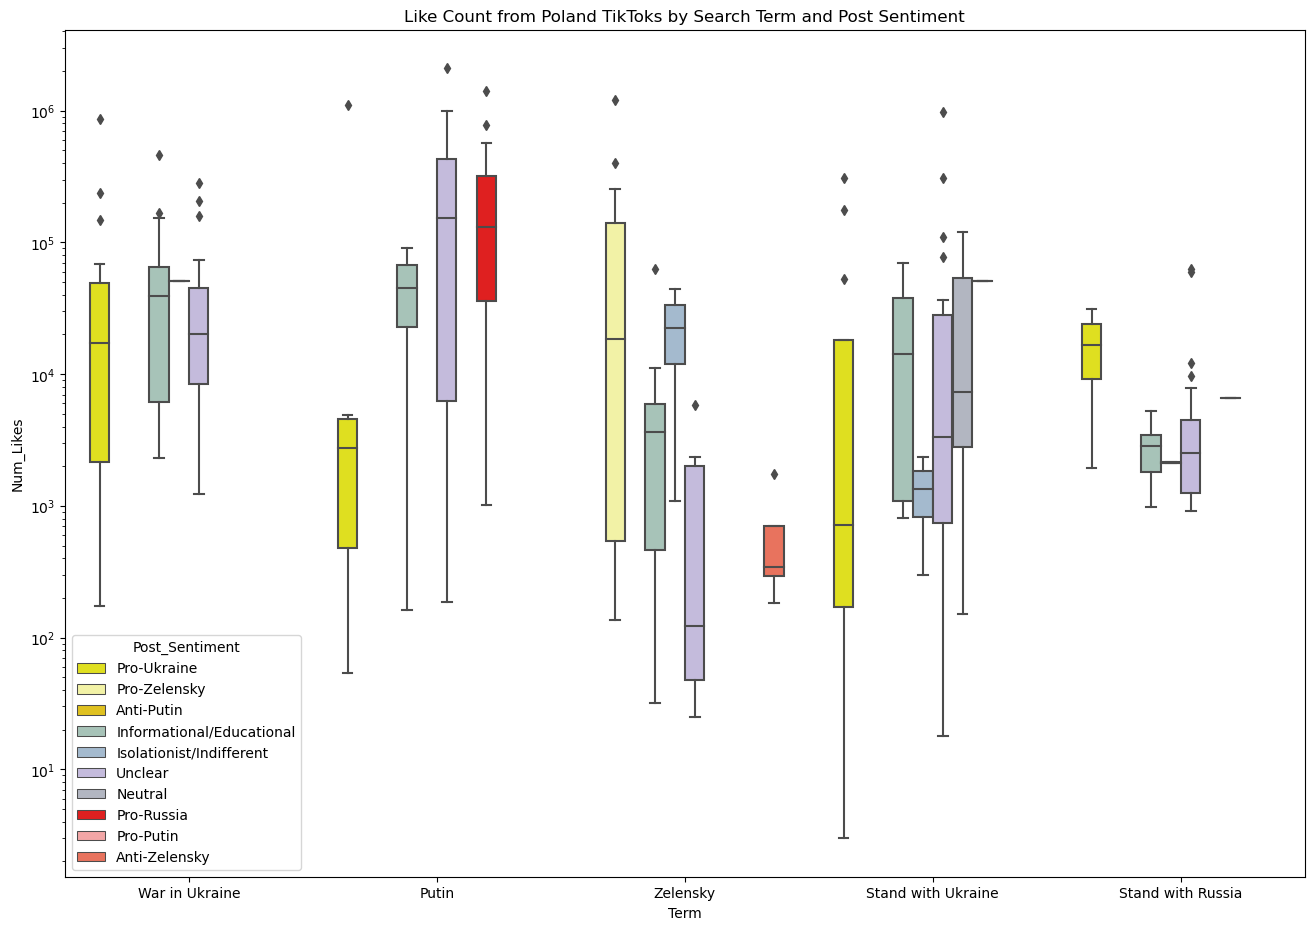

In [117]:
plt.figure(figsize=(16, 11))
sns.boxplot(x='Term', y='Num_Likes', hue='Post_Sentiment', data=poland_df, palette=custom_palette, hue_order=legend_order2)
plt.yscale('log')

# Add labels and title
plt.xlabel('Term')
plt.ylabel('Num_Likes')
plt.title('Like Count from Poland TikToks by Search Term and Post Sentiment')

Text(0.5, 1.0, 'Like Count from Bulgarian TikToks by Search Term and Post Sentiment')

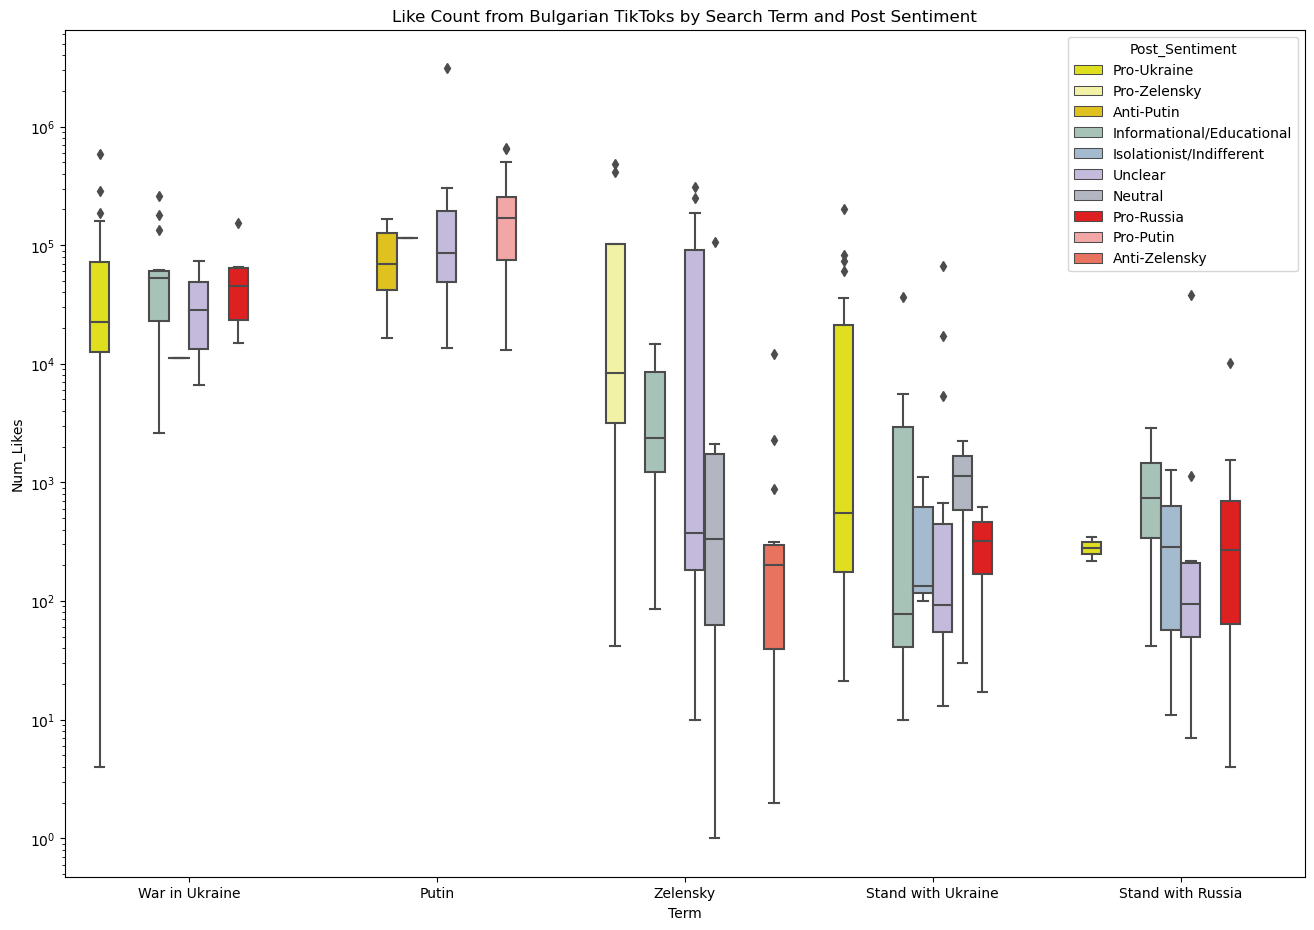

In [118]:
plt.figure(figsize=(16, 11))
sns.boxplot(x='Term', y='Num_Likes', hue='Post_Sentiment', data=bulgarian_df, palette=custom_palette, hue_order=legend_order2)
plt.yscale('log')

# Add labels and title
plt.xlabel('Term')
plt.ylabel('Num_Likes')
plt.title('Like Count from Bulgarian TikToks by Search Term and Post Sentiment')

Text(0.5, 1.0, 'Like Count from Romanian TikToks by Search Term and Post Sentiment')

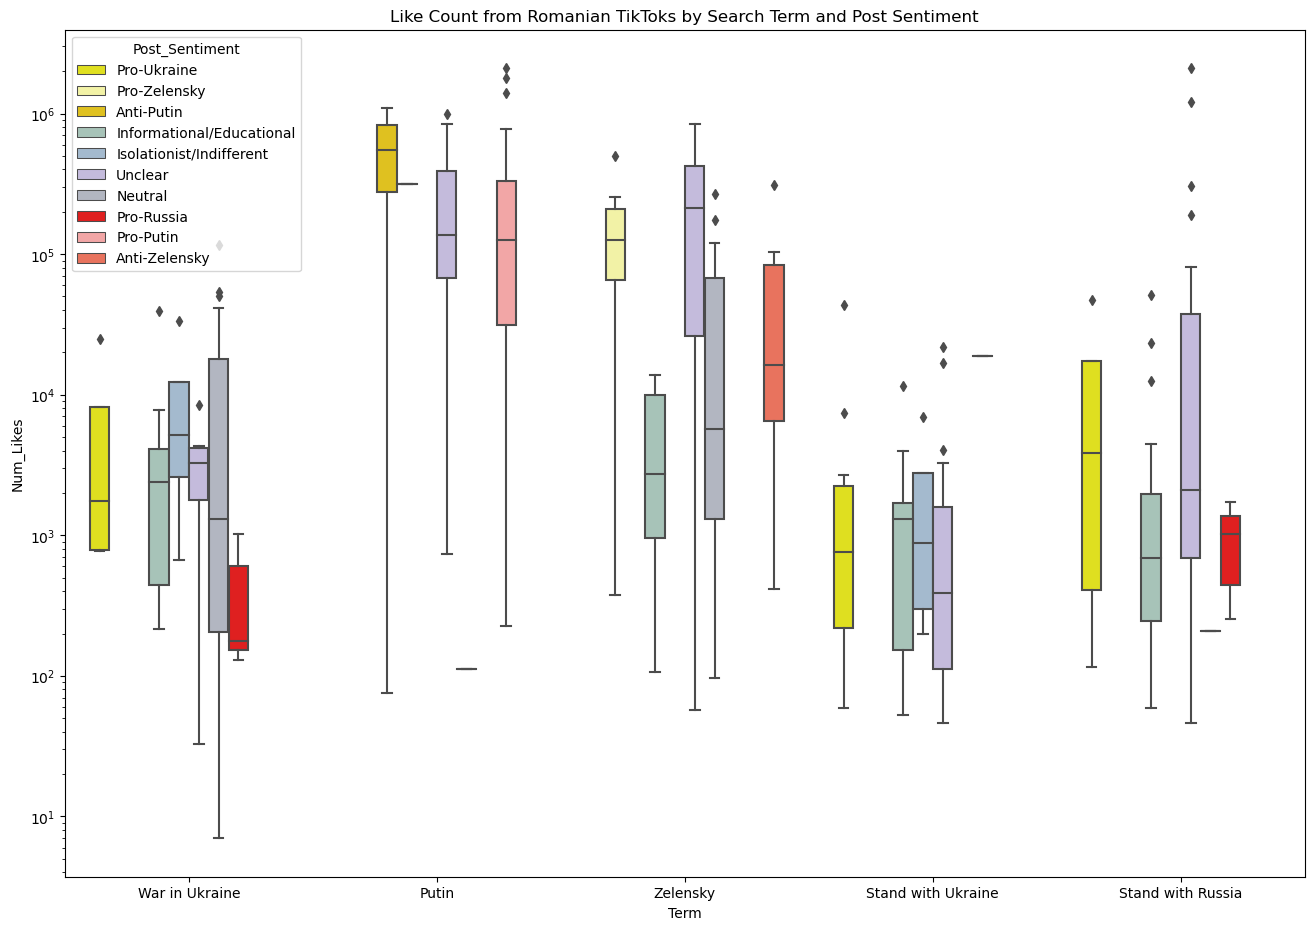

In [119]:
plt.figure(figsize=(16, 11))
sns.boxplot(x='Term', y='Num_Likes', hue='Post_Sentiment', data=romanian_df, palette=custom_palette, hue_order=legend_order2)
plt.yscale('log')

# Add labels and title
plt.xlabel('Term')
plt.ylabel('Num_Likes')
plt.title('Like Count from Romanian TikToks by Search Term and Post Sentiment')

## Boxplots for Comment Count

Text(0.5, 1.0, 'Comments Count from Poland TikToks by Search Term and Post Sentiment')

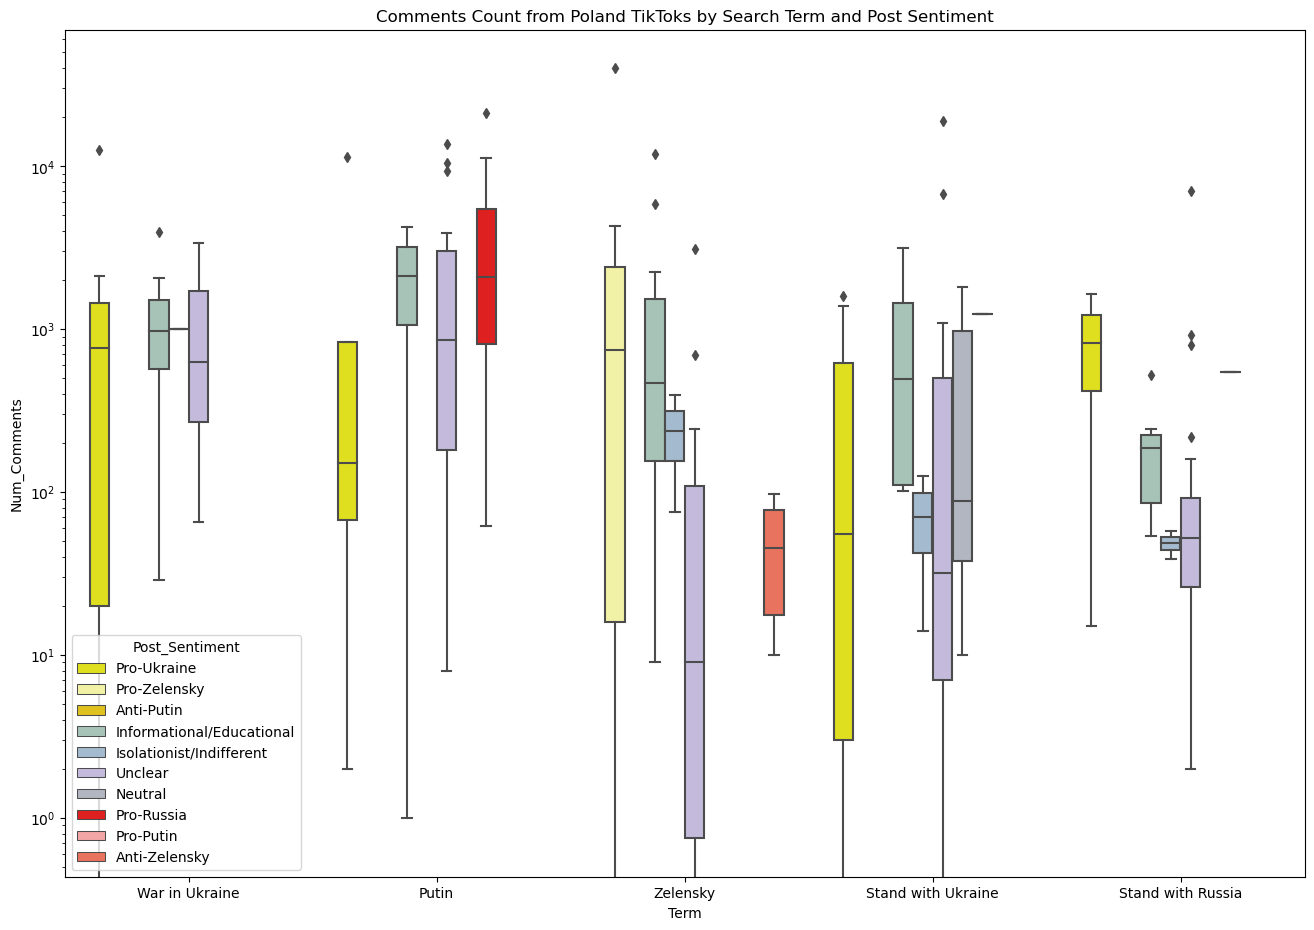

In [120]:
plt.figure(figsize=(16, 11))
sns.boxplot(x='Term', y='Num_Comments', hue='Post_Sentiment', data=poland_df, palette=custom_palette, hue_order=legend_order2)
plt.yscale('log')

# Add labels and title
plt.xlabel('Term')
plt.ylabel('Num_Comments')
plt.title('Comments Count from Poland TikToks by Search Term and Post Sentiment')

Text(0.5, 1.0, 'Comments Count from Bulgarian TikToks by Search Term and Post Sentiment')

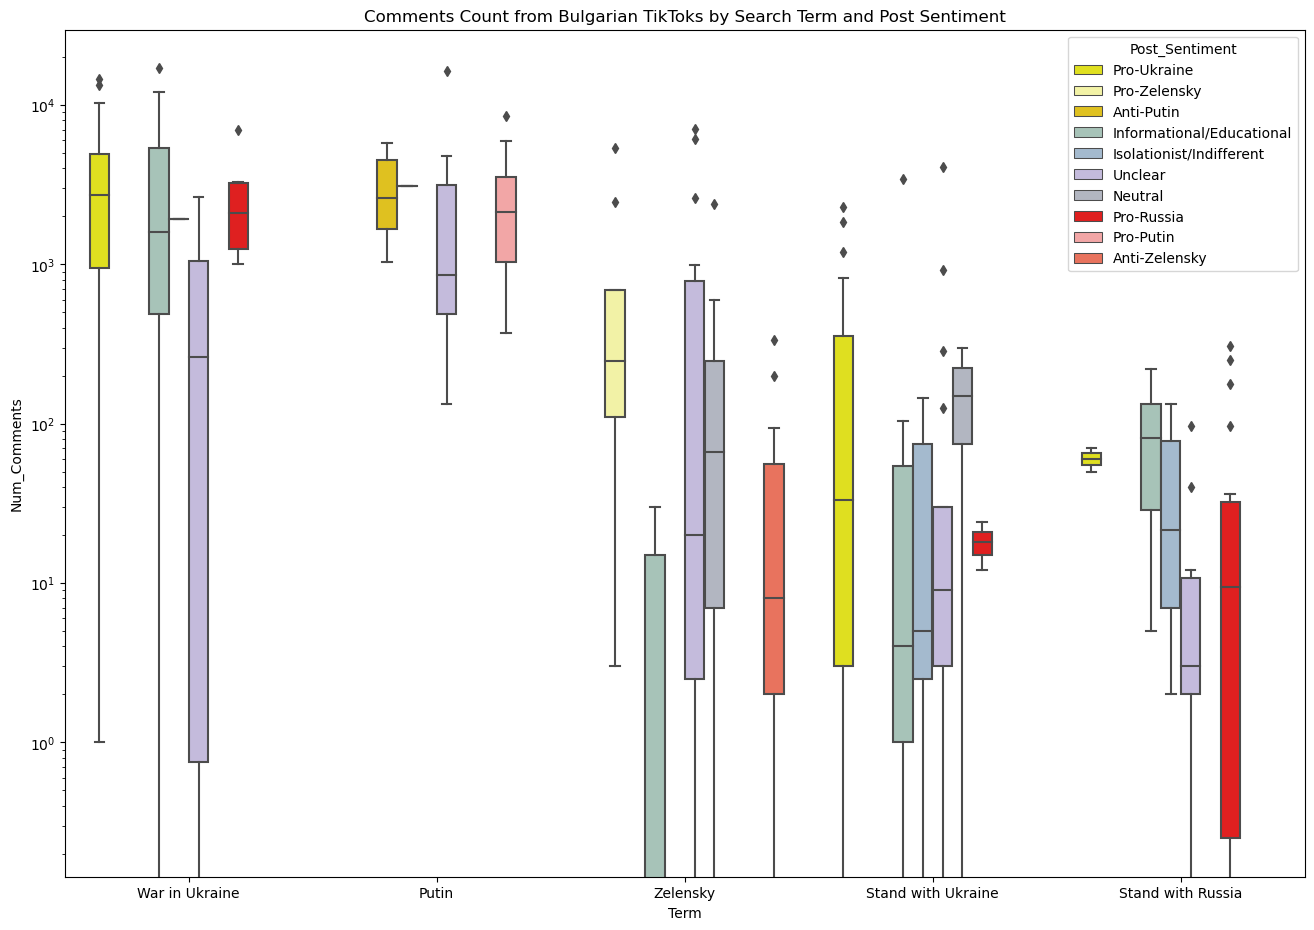

In [121]:
plt.figure(figsize=(16, 11))
sns.boxplot(x='Term', y='Num_Comments', hue='Post_Sentiment', data=bulgarian_df, palette=custom_palette, hue_order=legend_order2)
plt.yscale('log')

# Add labels and title
plt.xlabel('Term')
plt.ylabel('Num_Comments')
plt.title('Comments Count from Bulgarian TikToks by Search Term and Post Sentiment')

Text(0.5, 1.0, 'Comments Count from Romanian TikToks by Search Term and Post Sentiment')

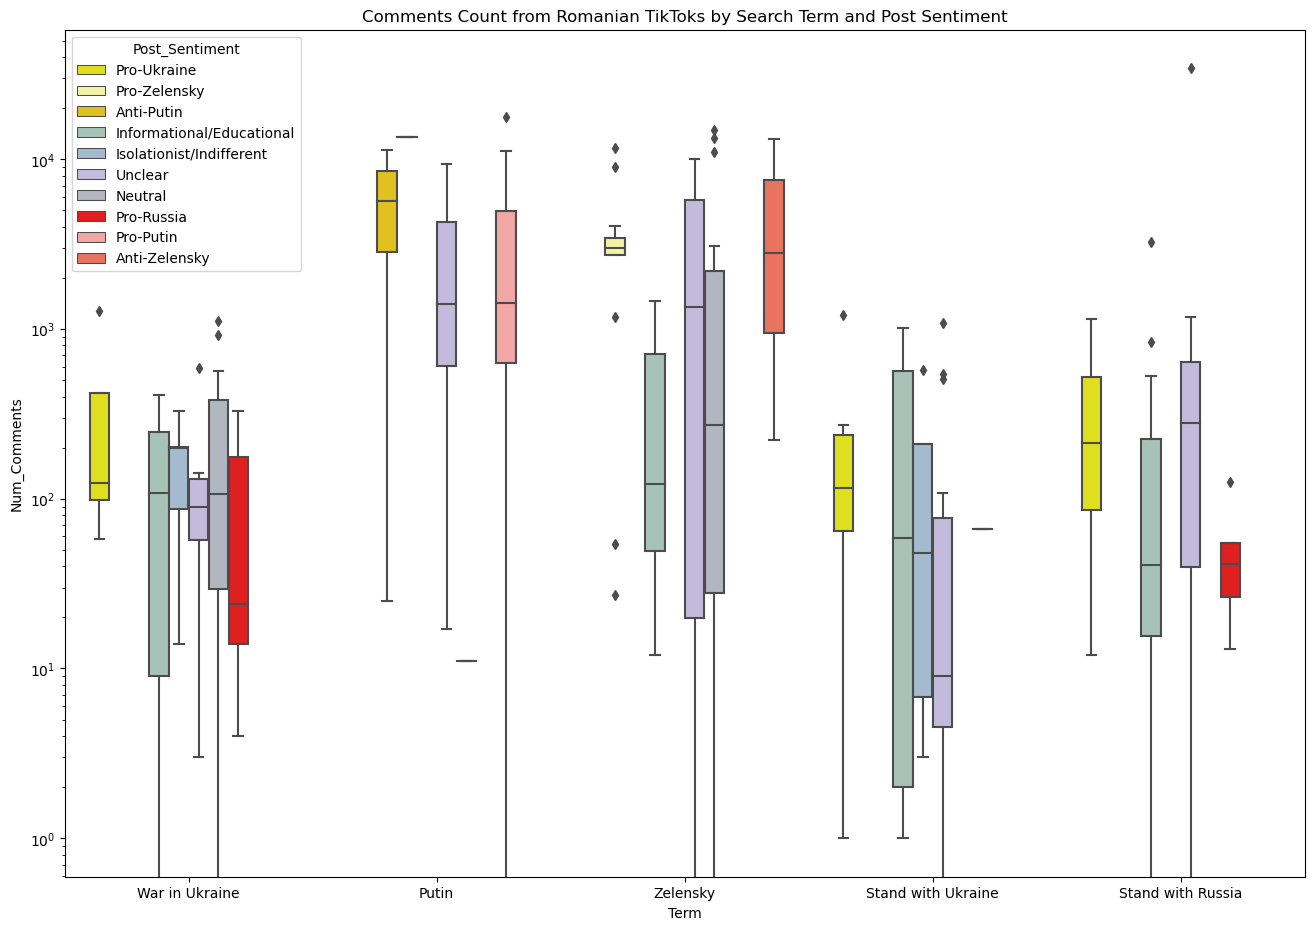

In [122]:
plt.figure(figsize=(16, 11))
sns.boxplot(x='Term', y='Num_Comments', hue='Post_Sentiment', data=romanian_df, palette=custom_palette, hue_order=legend_order2)
plt.yscale('log')

# Add labels and title
plt.xlabel('Term')
plt.ylabel('Num_Comments')
plt.title('Comments Count from Romanian TikToks by Search Term and Post Sentiment')

## 5. Geographic Variation in Sentiment

If you have geographic data, explore how sentiment varies by location. This can provide insights into regional differences in perspectives on the conflict.

In [125]:
bulgarian_df['Country'] = 'Bulgaria'
romanian_df['Country'] = 'Romania'
poland_df['Country'] = 'Poland'

combined_df = pd.concat([bulgarian_df, romanian_df, poland_df], ignore_index=True)

# If you want to concatenate along columns, you can use axis=1
# combined_df = pd.concat([df1, df2, df3], axis=1)

# Display the combined DataFrame
combined_df.head(5)

,Post Number,Term,Poster_Username,Num_Likes,Num_Comments,Num_Views,Hashtags_Used,Post_Sentiment,Comments_Sentiment,Country
0,1,War in Ukraine,kyo.fact,12600,4909,391500,#Ukraine will win🇺🇦 #warinukraine🇺🇦 #2023 #fac...,Pro-Ukraine,Mixed Reaction,Bulgaria
1,2,War in Ukraine,_nastassiadenz,22300,1018,1500000,#Россия🇷🇺 #Putin's Russia #Putin's stability #...,Pro-Ukraine,Agreement,Bulgaria
2,3,War in Ukraine,saveukraine888,12300,800,1200000,"#Feodosia #Crimea #Crimea, Ukraine #port #Russ...",Pro-Ukraine,Agreement,Bulgaria
3,4,War in Ukraine,choppedbrain,120200,884,3500000,#wardiary #war2023 #Ukraine #zsu #himars #vsu ...,Pro-Ukraine,Agreement,Bulgaria
4,5,War in Ukraine,envy_yep,41100,526,877300,#Prigozhin #zhenyaprigozhin #chkwwanger #wagne...,Unclear,Neutral/Unrelated,Bulgaria


In [136]:
counted_rows = combined_df.groupby(['Country', 'Post_Sentiment']).size().reset_index(name='Count')
counted_rows.head()

,Country,Post_Sentiment,Count
0,Bulgaria,Anti-Putin,9
1,Bulgaria,Anti-Zelensky,15
2,Bulgaria,Informational/Educational,37
3,Bulgaria,Isolationist/Indifferent,10
4,Bulgaria,Neutral,10


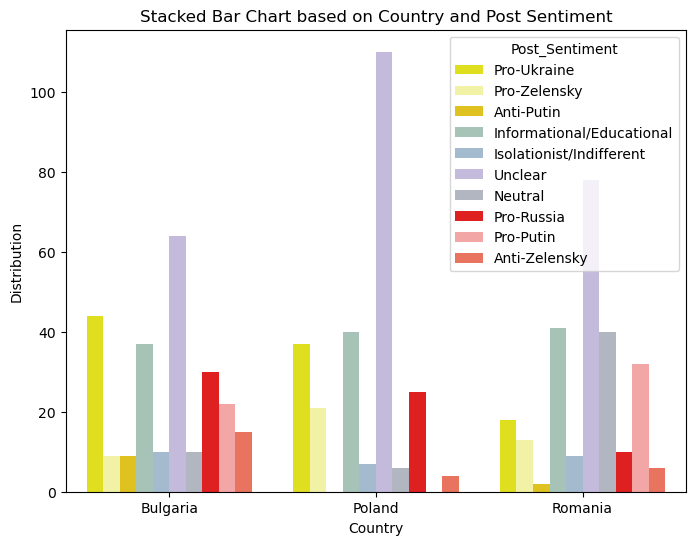

In [135]:
# Create a stacked bar chart using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Country', y='Count', hue='Post_Sentiment', data=counted_rows, palette=custom_palette, hue_order=legend_order2)

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Distribution')
plt.title('Stacked Bar Chart based on Country and Post Sentiment')
plt.show()

#### Sentiment Categories

Shared by all (4)

- Neutral, Isolationist/Indifferent, Informational/Educational, Unclear

'War in Ukraine', 'Stand with Ukraine', 'Stand with Russia' (2) 

- Pro-Ukraine, Pro-Russia

'Putin' (2)

- Pro-Putin, Anti-Putin

'Zelensky' (2)

- Pro-Zelensky, Anti-Zelensky

#### Things to Do

- Boxplot of Likes to Sentiment Category, per country (10 x 3)

- Boxplot of # of Comments to Sentiment Category, per country (10 x 3)

- Boxplot of Views to Sentiment Category, per country (10 x 3)

#### Historical Events

- Invasion of Ukraine, Feb 24, 2022

- Farmers' Protest

- Polish Election (Donald Tusk), Oct 15, 2023

- Bulgarian Election, Apr 2, 2023